Sample Data:
    GrLivArea  BedroomAbvGr  FullBath  OverallQual  YearBuilt  GarageArea  \
0       1710             3         2            7       2003         548   
1       1262             3         2            6       1976         460   
2       1786             3         2            7       2001         608   
3       1717             3         1            7       1915         642   
4       2198             4         2            8       2000         836   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

Model Performance:
Mean Squared Error (MSE): 1014670795.41
Root Mean Squared Error (RMSE): 31853.90
R² Score: 0.7910


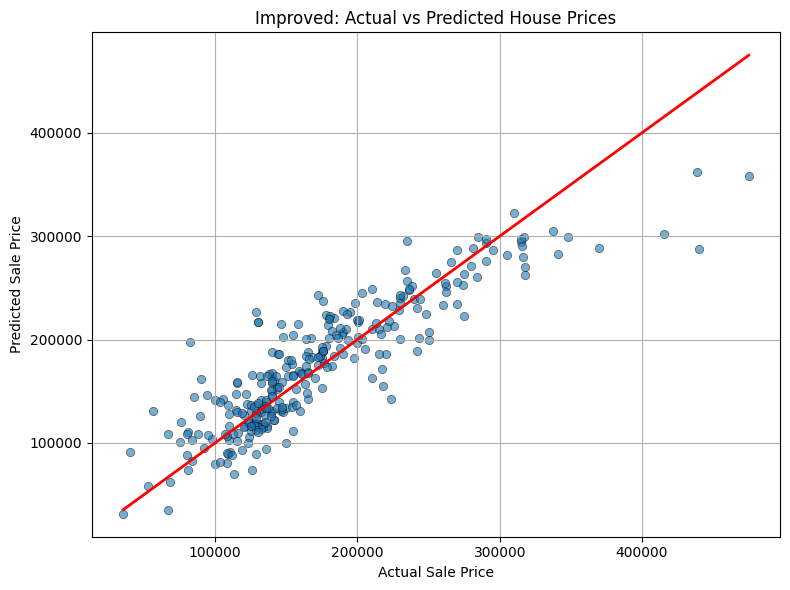


Model saved as 'improved_house_price_model.pkl'


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("train.csv")

# Display sample rows
print("Sample Data:\n", data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'YearBuilt', 'GarageArea', 'SalePrice']].head())

# Remove outliers — remove homes priced over 500,000
data = data[data['SalePrice'] < 500000]

# Select relevant features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'YearBuilt', 'GarageArea']
X = data[features]
y = data['SalePrice']

# Split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Improved: Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the model
import joblib
joblib.dump(model, 'improved_house_price_model.pkl')
print("\nModel saved as 'improved_house_price_model.pkl'")
